# Генерация и анализ CAD-моделей мебели различных стилей на основе текстовых описаний
---

# Введение
------------

# Проектирование изделия

1) Этап исследования
2) Этап эскизирования
3) **Техническое проектирование и моделирование**
4) Производство прототипов и тестирование
5) Внедрение и эксплуатация
-----------------

# Система автоматизированного проектирования


## CAD (Computer-Aided Design)
* Системы автоматизированного проектирования - создание моделей и чертежей

## CAM (Computer-Aided Manufacturing)
* Автоматизированные системы для подготовки программ под станки ЧПУ (вычислительные устройства для управления производственными процессами)

## CAE (Computer-Aided Engineering)
* Программы для решения инженерных задач (по факту, включает оба верхних понятия)
-------------

(-0.5, 1169.5, 347.5, -0.5)

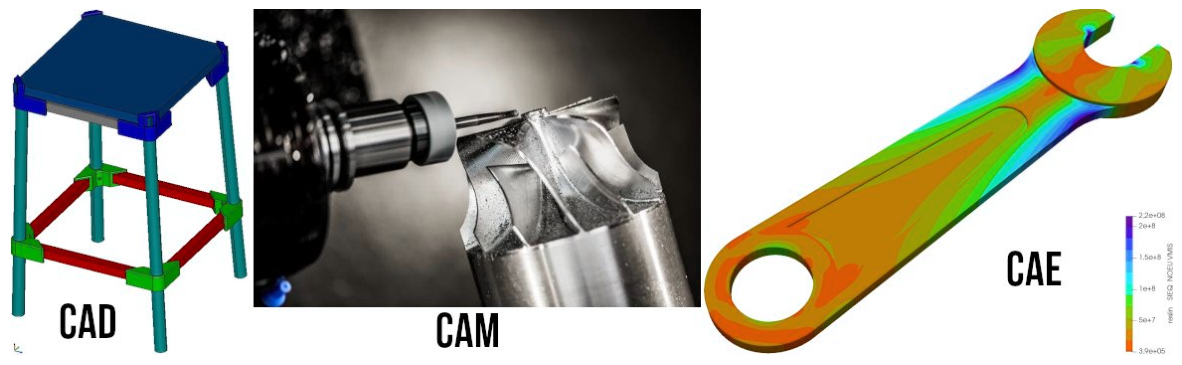

In [82]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cad-cam-cae.jpg')

plt.figure(figsize=(15,10))
plt.imshow(image)
plt.axis('off')

# CAD-программы:

1) AutoCAD — одна из самых известных программ для 2D и 3D проектирования.
2) SolidWorks — мощная программа для 3D-моделирования и сборки, широко используется в машиностроении.
3) Fusion 360 — облачное решение от Autodesk для 3D-моделирования, включая CAD, CAM и CAE в одном инструменте.
4) CATIA — профессиональная программа для 3D-моделирования, особенно популярна в авиационной и автомобильной промышленности.
5) Siemens NX — комплексная программа для CAD, CAE и CAM, используемая для разработки сложных изделий.
---

(-0.5, 1279.5, 959.5, -0.5)

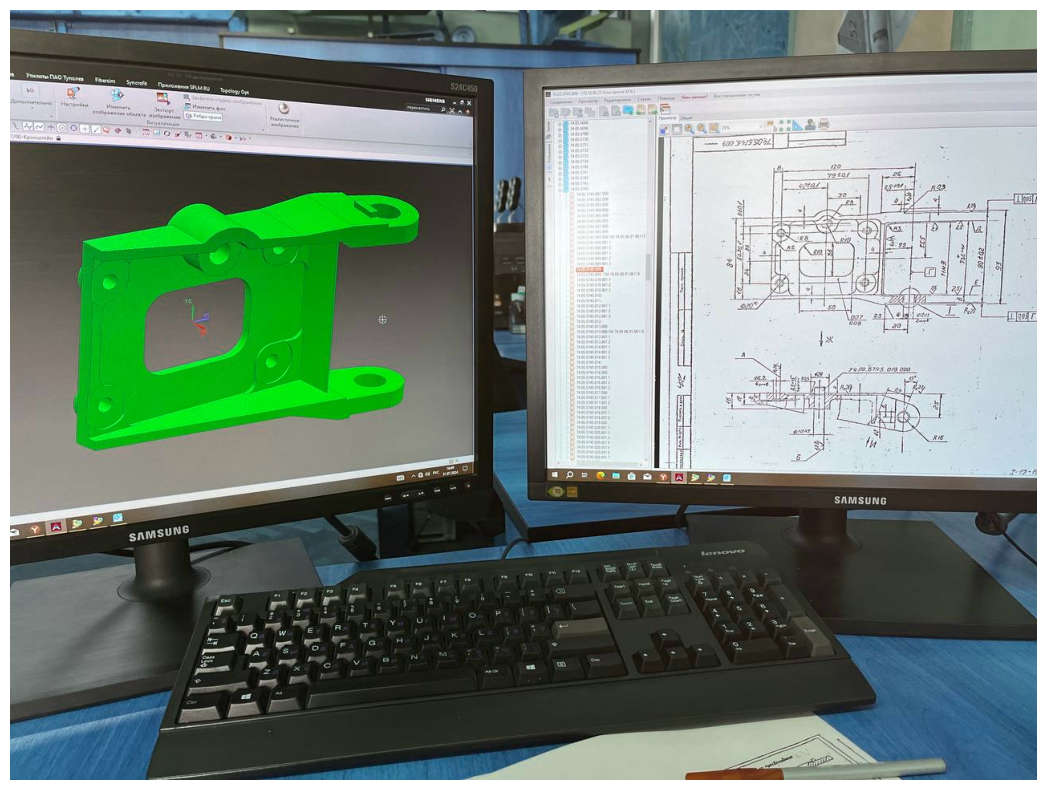

In [81]:
image = cv2.imread('tupolev.jpg')

plt.figure(figsize=(15,10))
plt.imshow(image)
plt.axis('off')

(-0.5, 1919.5, 1139.5, -0.5)

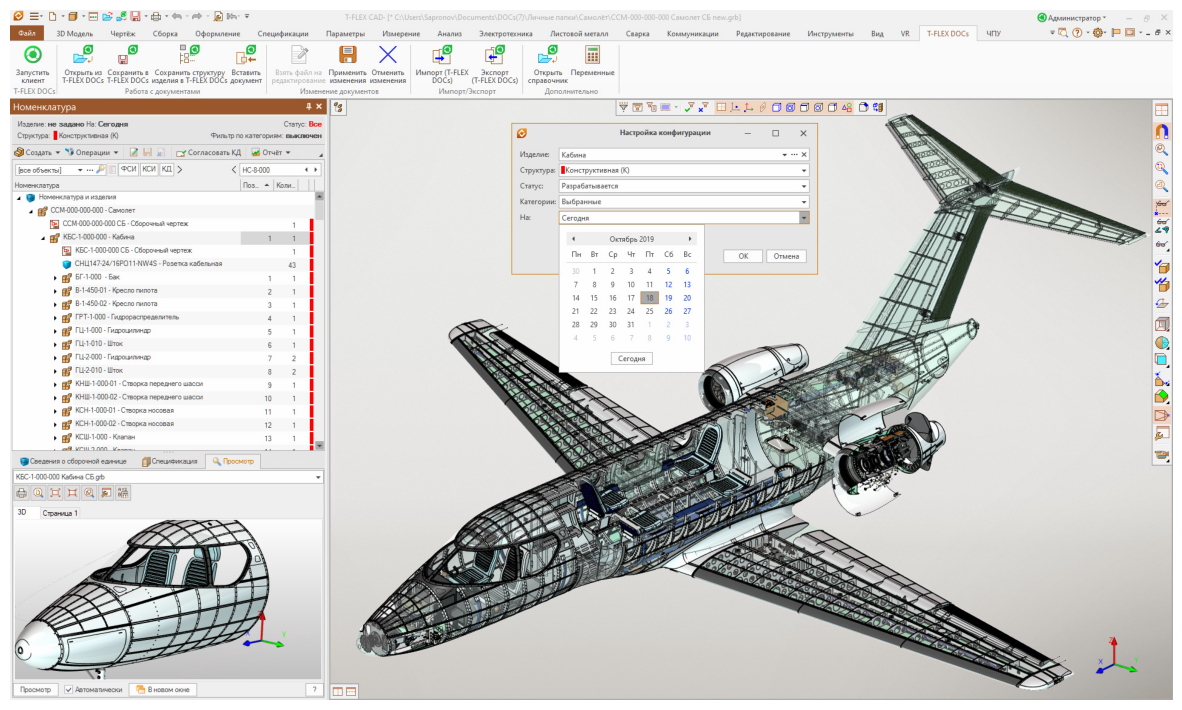

In [83]:
image = cv2.imread('airplane.jpg')

plt.figure(figsize=(15,10))
plt.imshow(image)
plt.axis('off')

# Зачем вообще генерировать 3D-модели с помощью LLM?

1. Автоматизация и ускорение процессов
2. Интуитивный интерфейс для не-специалистов
3. Оптимизация
4. Инновация

In [3]:
import cadquery as cq
from jupyter_cadquery import show

# Latex

In [4]:
# Extrude using 2D Sketch + Chamfer 

sketch_rect = cq.Sketch('XY').rect(5, 5)
result_rect = (
                cq.Workplane()
                .placeSketch(sketch_rect)
                .extrude(5)
                .chamfer(0.1)
)
show(result_rect)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

In [19]:
# Extrude using primitive geometry (box)
# Fillet - the cutting plane can be adjusted via .faces()

result = cq.Workplane().box(5, 5, 3).fillet(1)

show(result)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

Полезные методы:

* box(width, length, height) — создаёт прямоугольный параллелепипед.
* cylinder(radius, height) — создаёт цилиндр.
* sphere(radius) — создаёт сферу.
* translate((x, y, z)) — сдвигает объект на заданное расстояние.
* rotate(angle) — вращает объект.
* mirror() — зеркально отражает объект.
* cut() — вычитает один объект из другого.
* union() — объединяет два объекта.

In [51]:
result = (
    cq.Workplane("XY")
    .box(2, 3, 4)
    .translate((1, 1, 0))  # Сдвигаем второй объект
    .cut(cq.Workplane("XY").sphere(1))  # Объединяем с цилиндром
)

show(result)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

In [117]:
# Revolve

ring = (
        cq.Workplane(origin=(-5, 0, 0))
         .circle(1)
         .revolve(360, (5, -1, 0), (5, 1, 0))
)

show(ring)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

Метод .faces() в CadQuery позволяет выбрать одну или несколько граней (лицевых поверхностей) объекта для дальнейших операций, например, создания отверстий или других изменений. Символы >, <, || указывают, как мы выбираем эти грани относительно оси.

* '>Z' — выбирает грань, ориентированную по оси Z в положительную сторону (верхнюю грань).
* '<Z' — выбирает грань, ориентированную по оси Z в отрицательную сторону (нижнюю грань).
* '|Z' — выбирает грань, которая лежит в плоскости, параллельной оси Z (вдоль оси Z, на одной плоскости).

In [94]:
# Hole

holes = (
      cq.Workplane('XY')
      .rect(2, 2)
      .extrude(1, both=True)
      .faces('>Z') # выбираем самую верхнюю грань результирующего блока
      .rect(1,1)
      .vertices()
      .hole(0.25) # простое отверстие
)

show(holes)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

In [97]:
# Text

text_1 = cq.Workplane().text("CAD-generation", 4, 5).translate((0, 8, 0))
text_2 = (
       cq.Workplane()
       .box(10, 10, 5)
       .faces('>Z')
       .workplane()
       .text('AIRI', 5, -1)
)

show(text_1, text_2)

100% ⋮————————————————————————————————————————————————————————————⋮ (2/2)  0.41s


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

# Задания

1. Создайте цилиндр с радиусом 5 мм и высотой 20 мм. Выведите результат на экран.

In [6]:
result = cq.Workplane().cylinder(20, 5)
show(result)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

2. Создайте прямоугольный блок 30x30x10 мм с цилиндрическим вырезом радиусом 5 мм, расположенным по центру. Выведите результат на экран.

In [125]:
result = cq.Workplane().box(30, 30, 10).faces('>Z').hole(5).Work

show(result)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

3. Создайте форму, полученную вращением прямоугольного треугольника вокруг оси X. Катеты треугольника - 10 и 15 мм, вращение - вокруг оси X. Визуализируйте полученный результат. Экспортируйте модель в stl-формат.

In [169]:
triangle = cq.Workplane('XY').lineTo(10, 0).lineTo(0, 15).close()

result = triangle.revolve(360, (0, 0, 0), (1, 0, 0))
cq.exporters.export(result, 'my_model.stl')

show(result)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…